In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io,color,data,filters,exposure,util,transform,measure

# Hu moments

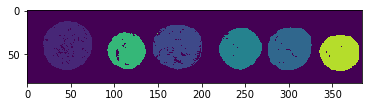

In [2]:
im=data.coins()[220:,:]
l=measure.label(im>100)

plt.imshow(l)

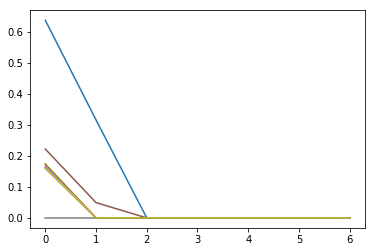

In [57]:
h=[]
for i in range(np.max(l)):
    m = measure.moments(np.double(l==i))
    cr=m[0,1]/m[0,0]
    cc=m[1,0]/m[0,0]
    mu = measure.moments_central(np.double(l==i),cr,cc)
    nu = measure.moments_normalized(mu)
    hu = measure.moments_hu(nu)
    h.append(hu)
    plt.plot(hu)

# PCA

/home/xing/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


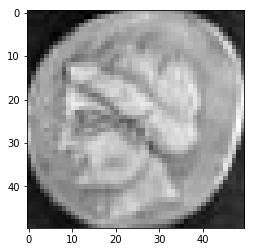

In [106]:
#plt.switch_backend('qt5agg')

im=data.coins();
l=measure.label(im>120);
s=[]
for i in range(1,l.max()):
    t=np.int8(l==i)
    if np.sum(t)>50 :
        x,y=np.nonzero(t)
        x1,x2,y1,y2=min(x),max(x),min(y),max(y)
        if np.abs((x2-x1)-(y2-y1))<10:
            s.append(transform.resize(im[x1:(x2+1),y1:(y2+1)],(50,50)))

plt.imshow(s[20])

In [108]:

x=np.zeros((2500,len(s)))
for i in range(len(s)):
    x[:,i]=np.reshape(s[i],2500)-s[i].mean()

xx=x.dot(x.T)
w,v=np.linalg.eig(xx)

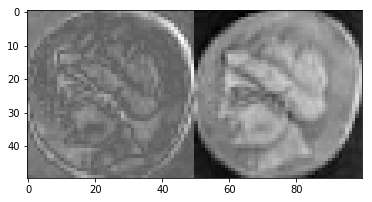

In [109]:
f=[]
d=21
plt.set_cmap('gray')
for i in range(len(s)):
    f.append(v[:,1:d].T.dot(np.reshape(s[i]-s[i].mean(),2500)))

m=np.abs(np.reshape(v[:,0],(50,50)))
plt.imshow(np.uint8(m/m.max()*255))
result=(np.uint8(100+300*np.reshape(np.abs(v[:,1:d].dot(f[20])),(50,50))))
plt.imshow(np.hstack((result,s[20]*255)))